In [2]:
using PyPlot
using JuMP, Ipopt

In [3]:
include("../src/model.jl");
include("../src/diagnostics.jl");
include("../src/optimization.jl");
include("../src/plotting.jl");
include("../src/defaults.jl");

## Initialize model

In [4]:
dt = 1.
t = Array(2020:dt:2100);
model = ClimateModel(
    "soldatenko",
    t,
    dt,
    present_year,
    Economics0(t),
    Physics(),
    init_zero_controls(t)
);

In [5]:
optimize_controls!(
    model,
    obj_option = "temp",
    temp_goal = δT_init+1.0,
    temp_final = δT_init,
    max_deployment=Dict("remove"=>0., "mitigate"=>0., "geoeng"=>1., "adapt"=>0.),
    start_deployment=Dict("remove"=>2020., "mitigate"=>2020., "geoeng"=>2020., "adapt"=>2020.),
);


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

Solve_Succeeded


### Plotting the optimal solution state

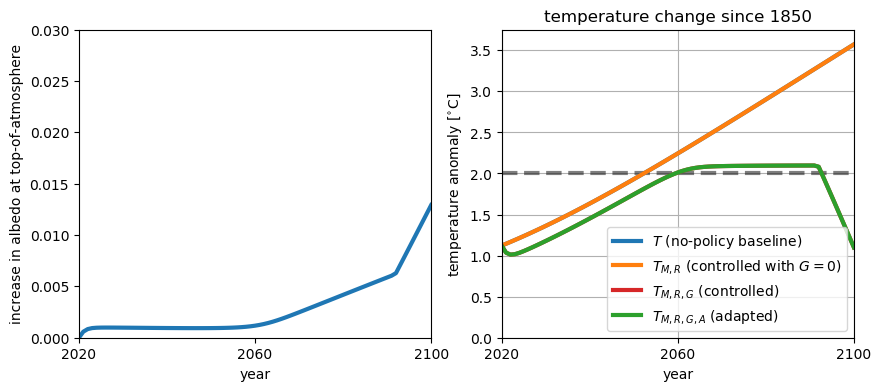

In [19]:
figure(figsize=(10,4))
subplot(1,2,1)
S0 = 1361.
plot(model.domain, (model.controls.geoeng*8.5)*4/S0, label="Albedo")
xlabel("year")
ylabel("increase in albedo at top-of-atmosphere")
xticks([2020, 2060, 2100])
xlim([2020, 2100])
ylim([0,0.03])

subplot(1,2,2)
plot_temperatures(model)
legend()
xlim([2020, 2100])
savefig("../figures/replicate_Soldatenko.pdf", bbox_inches="tight", dpi=150)